# Sprint 7: Análisis estadístico para detectar patrones y outliers


## Distribuciones, histogramas, variabilidad y detección de outliers (IQR y Z-score)

## 🎯 Objetivos de la sesión
Al final de esta clase podrás:

1. Explicar qué es una **distribución** y cómo se interpreta un **histograma**.
1. Entender qué es la **distribución normal** y qué significa “**normalidad**” en análisis de datos.
2. Diferenciar medidas de **tendencia central** vs **variabilidad**.
3. Calcular e interpretar **rango**, **IQR**, **varianza** y **desviación estándar**.
4. Entender **percentiles y cuartiles** como “puntos de corte” de una distribución.
5. Detectar outliers con dos enfoques:
   - **Rango intercuartílico (IQR)**
   - **Z-score**
6. Decidir qué método usar según el tipo de distribución y el objetivo del análisis.

## 🧭 Agenda
1. **Distribuciones y forma**
   - simétrica, sesgada, colas largas, multimodal
2. **Histogramas: cómo leerlos**
   - bins, densidad, forma, centro, dispersión
3. **Variabilidad (20–30 min)**
   - rango, IQR, varianza, desviación estándar
4. **Cuartiles y percentiles**
   - Q1, Q2, Q3; P90, P95
5. **Outliers**
   - IQR rule
   - Z-score
   - comparación, pros/cons

## ¿Qué es una distribución?

Una **distribución** describe cómo se reparten los valores de una variable (por ejemplo: ingresos, tiempos de entrega, precios).

Cuando observas una distribución, analiza:
- **Centro**: ¿dónde se concentra la mayoría? (media/mediana)
- **Dispersión**: ¿qué tan “esparcidos” están los datos?
- **Forma**:
  - **Simétrica** (valores equilibrados a ambos lados)
  - **Sesgada a la derecha** (cola larga hacia valores altos: ingresos, revenue)
  - **Sesgada a la izquierda** (cola hacia valores bajos: notas con “techo”)
  - **Multimodal** (varios picos: mezcla de grupos distintos)


![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs40277-016-0055-9/MediaObjects/40277_2016_55_Fig1_HTML.gif)

## Medidas de variabilidad (dispersión)

### Rango
`max - min`  
Simple, pero **muy sensible a outliers**.

![](https://numiqo.es/assets/tutorial/Rango.png)


### Varianza y desviación estándar
- **Varianza**: promedio del cuadrado de la distancia a la media.  
- **Desviación estándar (std)**: raíz de la varianza (misma unidad del dato).

![](https://numiqo.es/assets/tutorial/Desviaci%C3%B3n_est%C3%A1ndar.png)

Idea clave:
- std grande = datos más dispersos

Advertencia:
- media y std se afectan por outliers; por eso, para distribuciones sesgadas suelen ser menos estables.

### Percentiles y cuartiles
- Percentil `P90`: el 90% de los datos está por debajo.
- Cuartiles:
  - `Q1` = P25
  - `Q2` = P50 (mediana)
  - `Q3` = P75

  ![](https://numiqo.es/assets/tutorial/Cuartil.png)

### IQR (rango intercuartílico)
`IQR = Q3 - Q1`  
Mide la dispersión del “centro” del 50% de los datos.  

![](https://numiqo.es/assets/tutorial/Rango-intercuart%C3%ADlico.png)

## Distribución normal (gaussiana) y “normalidad”

### ¿Qué es la distribución normal?

La **distribución normal** (o **gaussiana**) es una distribución **simétrica** con forma de “campana”, donde:
- La mayoría de valores se concentran alrededor del centro.
- La frecuencia disminuye gradualmente hacia los extremos (colas).
- En la normal ideal: **media = mediana = moda**.

![](https://economipedia.com/wp-content/uploads/Captura-de-pantalla-2019-09-10-a-les-11.09.35.png)


Se define por:
- **μ (mu)**: media (centro)
- **σ (sigma)**: desviación estándar (dispersión)

Intuición:
- σ grande → campana “ancha” (más dispersión)
- σ pequeña → campana “estrecha” (más concentración)

### ¿Qué significa “normalidad”?
**Normalidad** es asumir (o verificar) que los datos se comportan **aproximadamente** como una normal.

Importa porque habilita interpretaciones y reglas útiles:
- **Regla 68–95–99.7** (aproximación):
  - ~68% de valores dentro de ±1σ
  - ~95% dentro de ±2σ
  - ~99.7% dentro de ±3σ

![](https://learn.polimake.com/wp-content/uploads/2024/05/3a24887bd3652ec0298f2788d92e8db2-1024x695-1.png)

Traducción práctica:
- Si una variable es ~normal, un valor con `|z| > 3` es raro → candidato a outlier.

## Histograma: cómo interpretarlo sin caer en la trampa de los bins
Un **histograma** agrupa valores en intervalos (**bins**) y cuenta cuántos caen en cada uno.

Qué mirar:
1. **Picos (modas)**: ¿hay uno o varios?
2. **Colas**: ¿hacia dónde se estira? (sesgo)
3. **Huecos**: posibles errores o subgrupos
4. **Escala**: un outlier puede “aplanar” el resto
5. **Bins**: cambiar bins puede cambiar la narrativa (sin cambiar los datos)

![](https://math.libretexts.org/@api/deki/files/44754/clipboard_ec60e40431fb8ebdb3f662854e5bf1c6f.png)
![](https://www.cyta.com.ar/biblioteca/bddoc/bdlibros/herramientas_calidad/histograma_archivos/histog1.gif)


Regla práctica:
- Si el histograma cambia mucho con bins distintos, complementa con **boxplot** y **percentiles**.


## Detección de outliers

### Método IQR (regla de Tukey)
1. Calcula `Q1` y `Q3`
2. `IQR = Q3 - Q1`
3. Límites:
   - Inferior: `Q1 - 1.5 * IQR`
   - Superior: `Q3 + 1.5 * IQR`
4. Fuera de límites → outlier

✅ Ventajas:
- No asume normalidad
- Robusto en distribuciones sesgadas

⚠️ Limitaciones:
- En colas largas puede marcar muchos casos extremos reales

![](https://siepsi.com.co/wp-content/uploads/2023/06/Cuartiles.png)

![](https://panamahitek.com/wp-content/uploads/2023/10/image-12.png)
---

### Método Z-score
`z = (x - mean) / std`

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwAxe9KSA3CGq5ui56vfPTC-i2Km2ilcejXQ&s)

Regla típica:
- `|z| > 3` → outlier fuerte (a veces `> 2.5`)

✅ Ventajas:
- Muy interpretable si hay **normalidad aproximada**

⚠️ Limitaciones:
- Outliers contaminan media y std (el outlier puede “camuflarse”)
- En sesgo/colas largas suele fallar sin transformación

![](https://editor.analyticsvidhya.com/uploads/440971.png)

### ¿Cuál usar?
- Variable ~normal → Z-score puede funcionar bien.
- Variable sesgada/cola larga → IQR suele ser más estable.
- En negocio: antes de “limpiar”, decide si el outlier es **error** o **caso extremo real** (VIP, evento, fraude, etc.).


In [ ]:
# Demostraciones de codigo

import pandas as pd

url='https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/diabetes.csv'

df = pd.read_csv(url)

df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


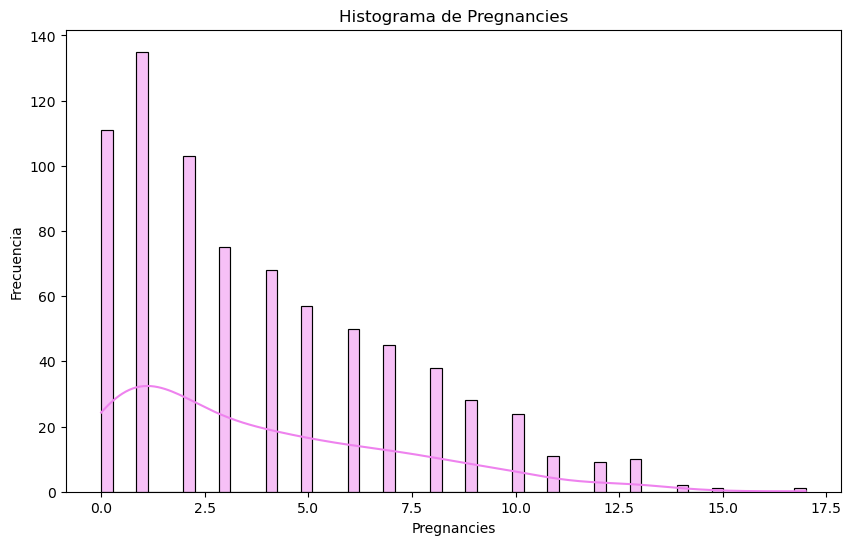

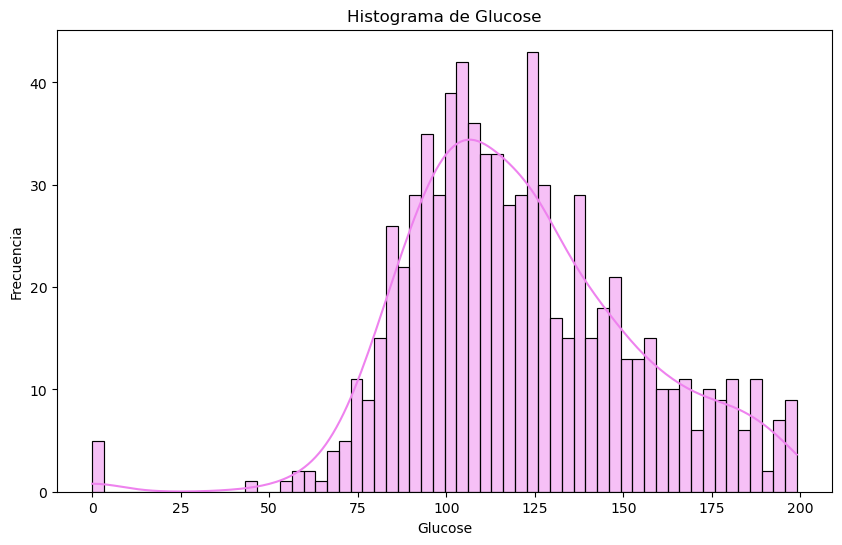

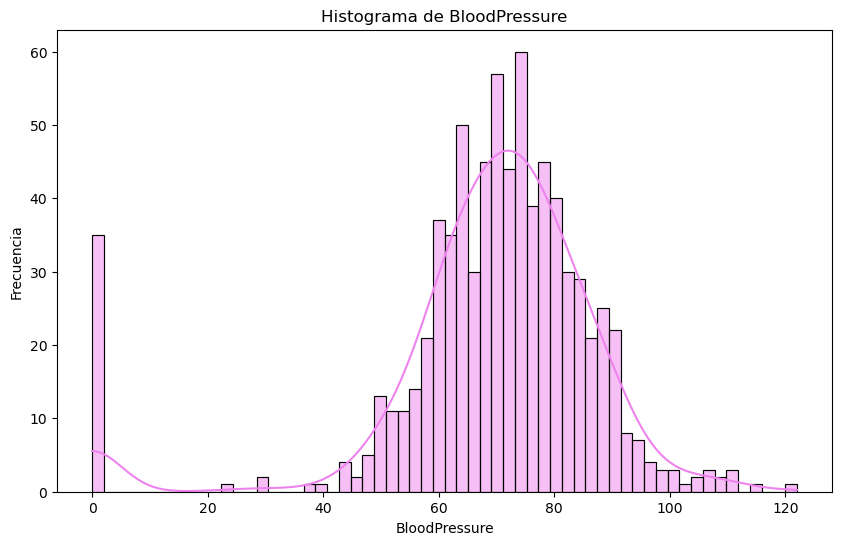

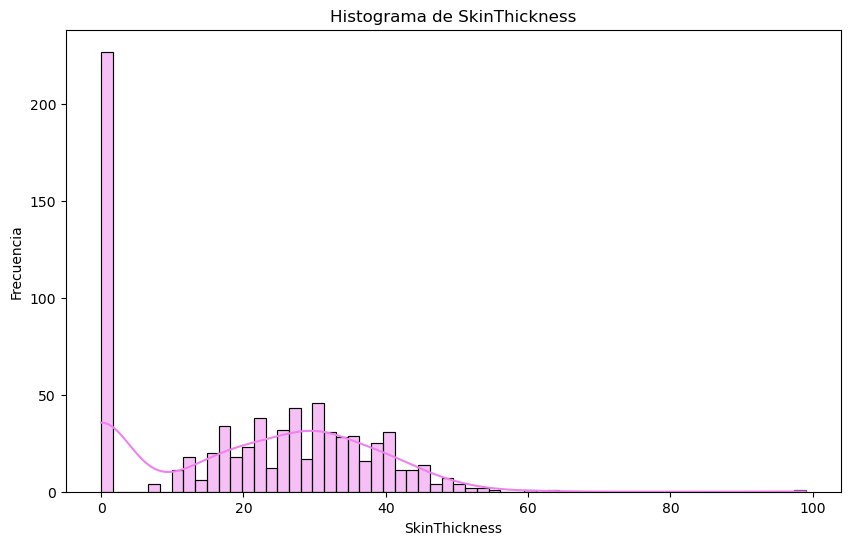

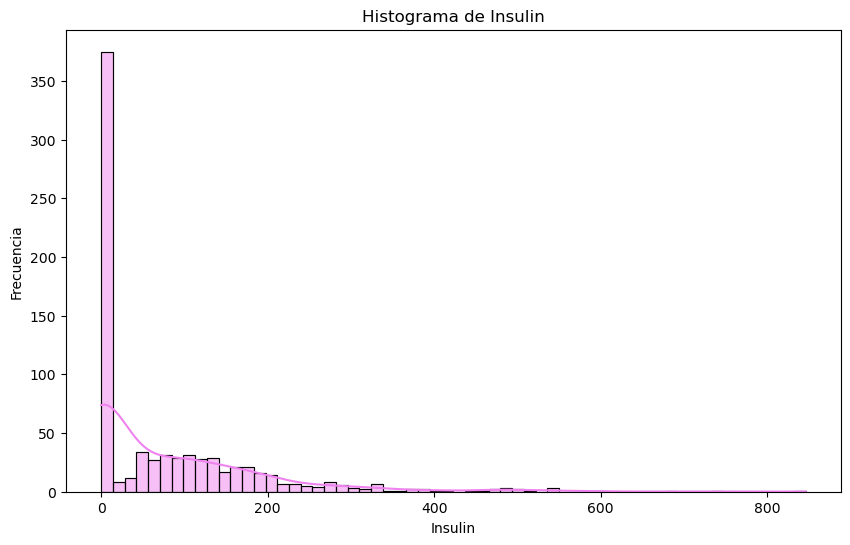

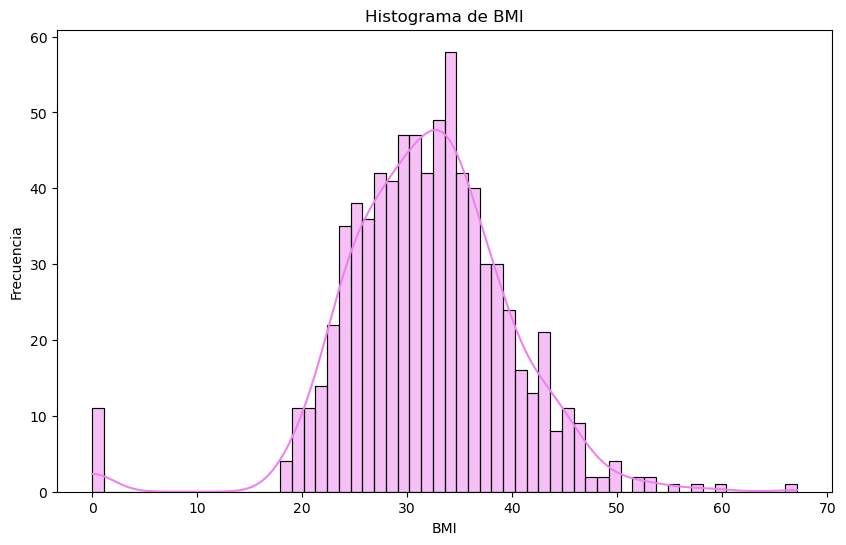

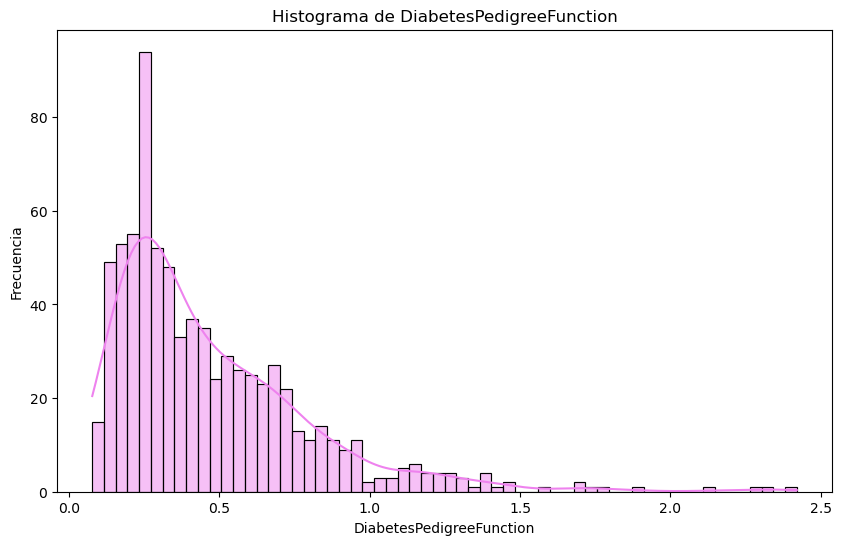

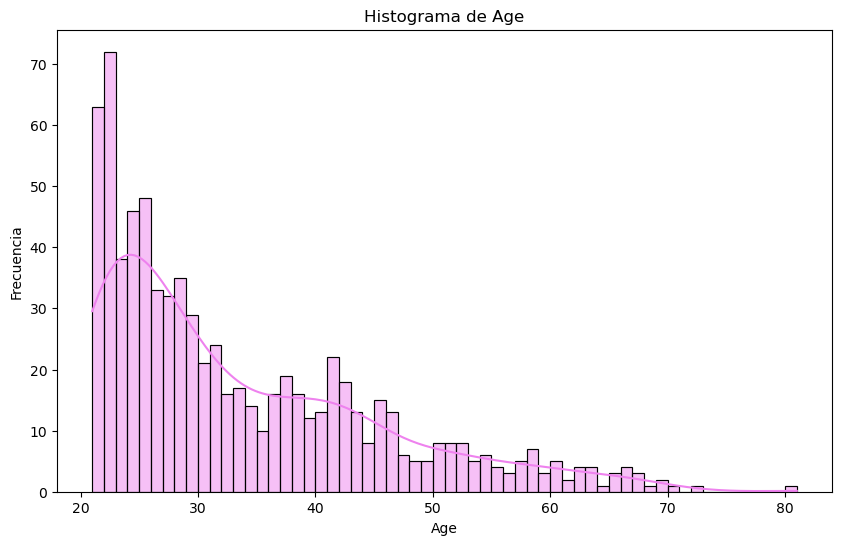

In [33]:
# Histogramas
import matplotlib.pyplot as plt
import seaborn as sns


df['Outcome']= df['Outcome'].astype('category')

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=60, kde=True, color='violet')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


In [34]:
# Outliers en `pregnancies`. Metodo IQR
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]
print("Outliers en 'Pregnancies':")
display(outliers)

Outliers en 'Pregnancies':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


Text(0.5, 0, 'Pregnancies')

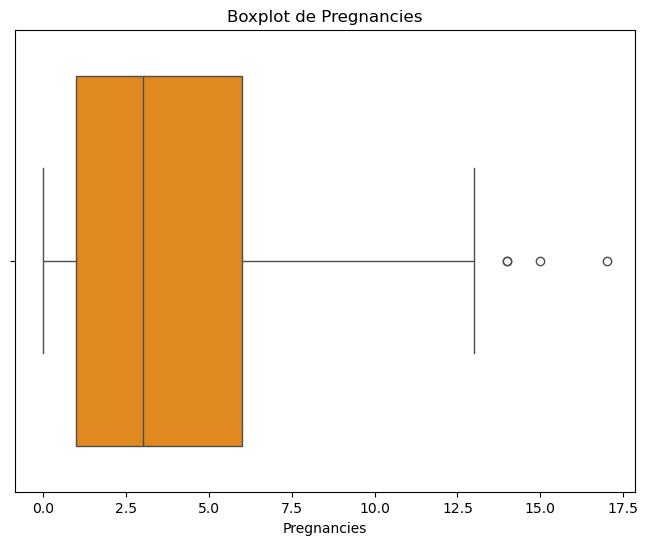

In [35]:
#Veamos un boxplot para visualizar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Pregnancies'], color='darkorange')
plt.title('Boxplot de Pregnancies')
plt.xlabel('Pregnancies')

**¿Que harías con estos datos**
* Son errores?
* Son parte de la naturaleza del fenomeno?
* Generan alguna alteración en las metricas o resultados de los estudios?

In [36]:
#Analizamos los outliers de `Blood pressure` usando el mismo metodo IQR
Q1_bp = df['BloodPressure'].quantile(0.25)
Q3_bp = df['BloodPressure'].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp
lower_bound_bp = Q1_bp - 1.5 * IQR_bp
upper_bound_bp = Q3_bp + 1.5 * IQR_bp
outliers_bp = df[(df['BloodPressure'] < lower_bound_bp) | (df['BloodPressure'] > upper_bound_bp)]
print("Outliers en 'BloodPressure':")
display(outliers_bp)



Outliers en 'BloodPressure':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

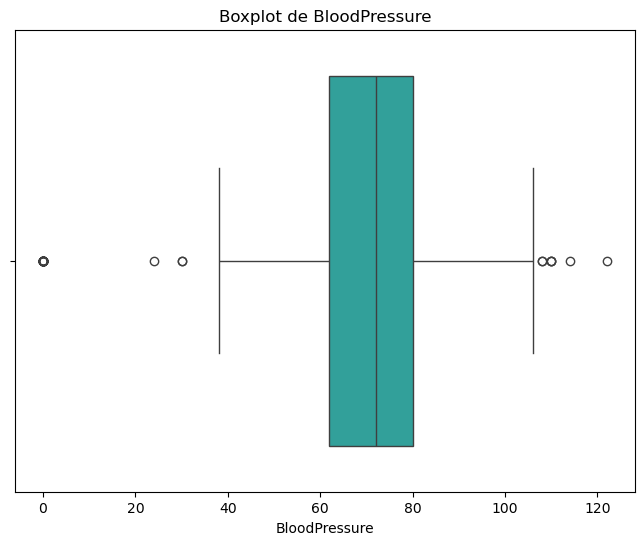

In [37]:
#Veamos el boxplot para visualizar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BloodPressure'], color='lightseagreen')
plt.title('Boxplot de BloodPressure')
plt.xlabel('BloodPressure') 

display(df['BloodPressure'].describe())

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

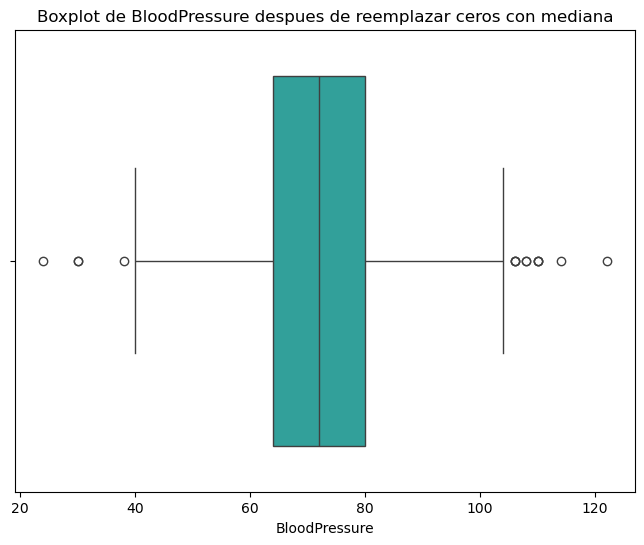

In [40]:
# Hagamos manejo de los valores "0" en `BloodPressure`

#OPCION 1: Reemplazar los ceros con la mediana de la columna
df['BloodPressure']= df['BloodPressure'].replace(0, df['BloodPressure'].median())

#Visualizar el cambio
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BloodPressure'], color='lightseagreen')
plt.title('Boxplot de BloodPressure despues de reemplazar ceros con mediana')
plt.xlabel('BloodPressure')
display(df['BloodPressure'].describe())

count    768.000000
mean      72.158854
std       10.443155
min       52.000000
25%       64.000000
50%       72.000000
75%       80.000000
max       90.000000
Name: BloodPressure, dtype: float64

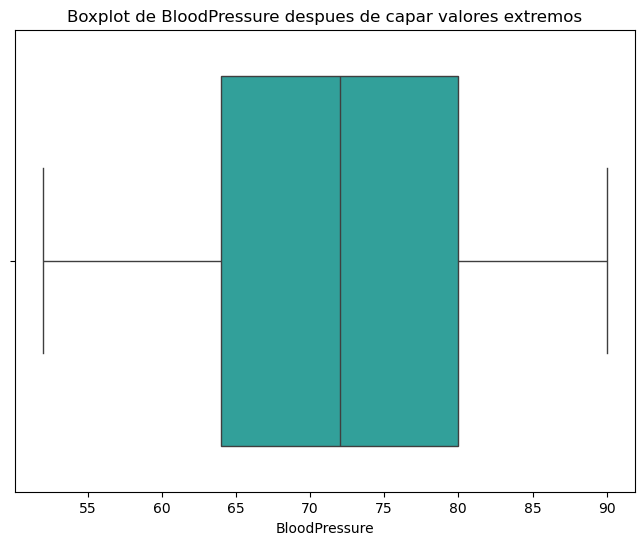

In [41]:
# OPCION 2: Capar o limitar los valores extremos en `BloodPressure`
lower_cap = df['BloodPressure'].quantile(0.05)
upper_cap = df['BloodPressure'].quantile(0.95)
df['BloodPressure'] = df['BloodPressure'].clip(lower_cap, upper_cap)

# Visualizar el cambio
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BloodPressure'], color='lightseagreen')
plt.title('Boxplot de BloodPressure despues de capar valores extremos')
plt.xlabel('BloodPressure')
display(df['BloodPressure'].describe())

In [ ]:
#Outliers por el metodo Z-score para la variable 'Glucose'

mean= df['Glucose'].mean()
std= df['Glucose'].std()

z_scores = (df['Glucose'] - mean) / std
outliers_z = df[(z_scores > 3) | (z_scores < -3)]
print("Outliers en 'Glucose' usando Z-score:")
display(outliers_z)

Outliers en 'Glucose' usando Z-score:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,52,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


<Axes: xlabel='Glucose', ylabel='Count'>

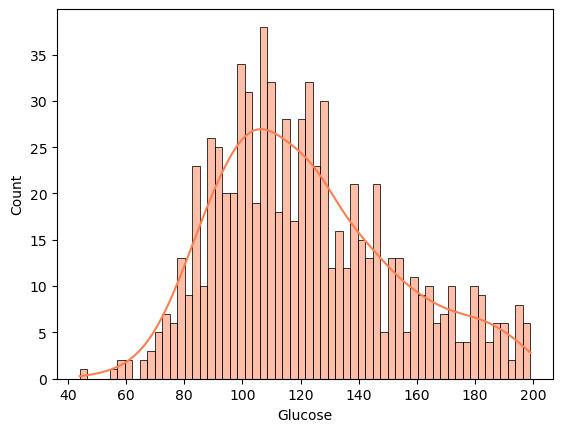

In [55]:
# La glucosa es una variable critica para el diagnostico de diabetes, por lo que eliminaremos los outliers detectados dado que es imputarlos podria distorsionar el analisis.
df.drop(outliers_z.index, axis=0, inplace=True)

sns.histplot(df['Glucose'], bins=60, kde=True, color='coral')

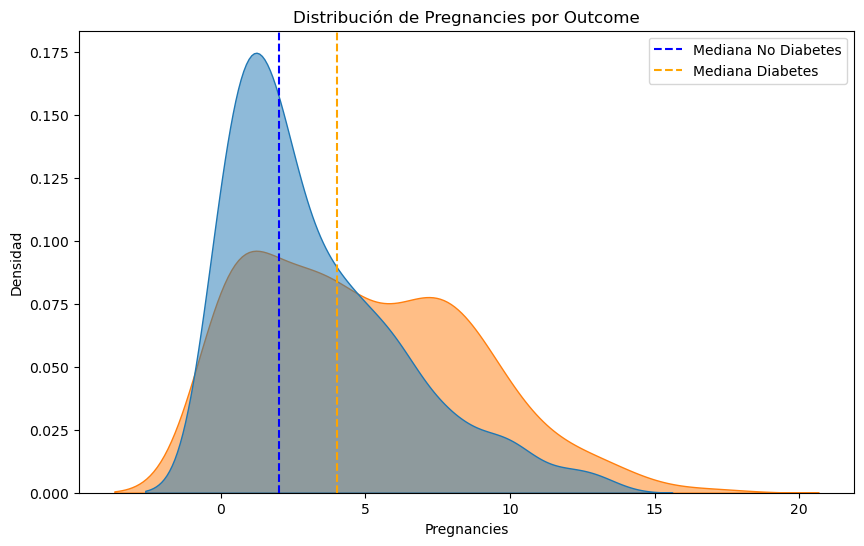

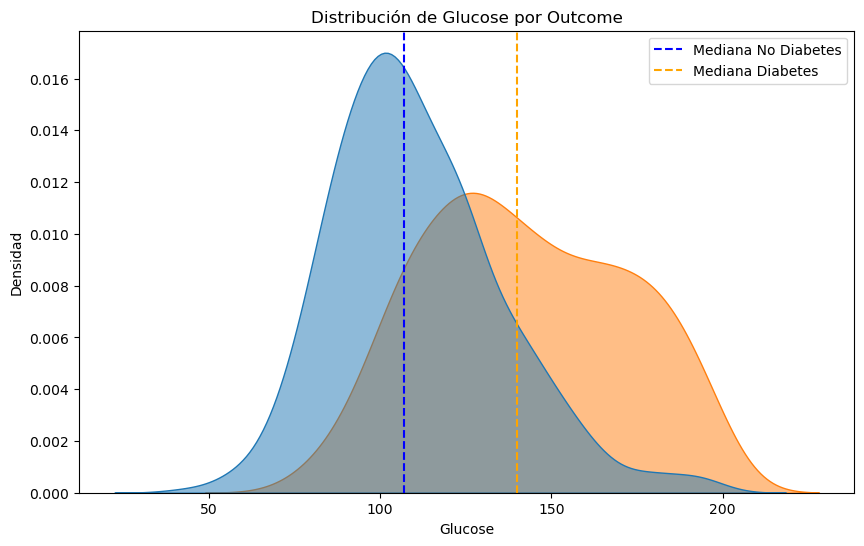

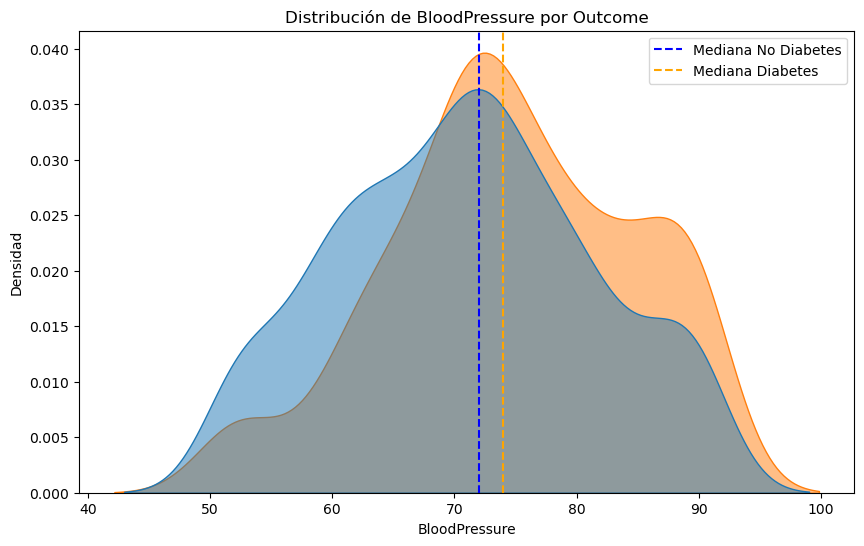

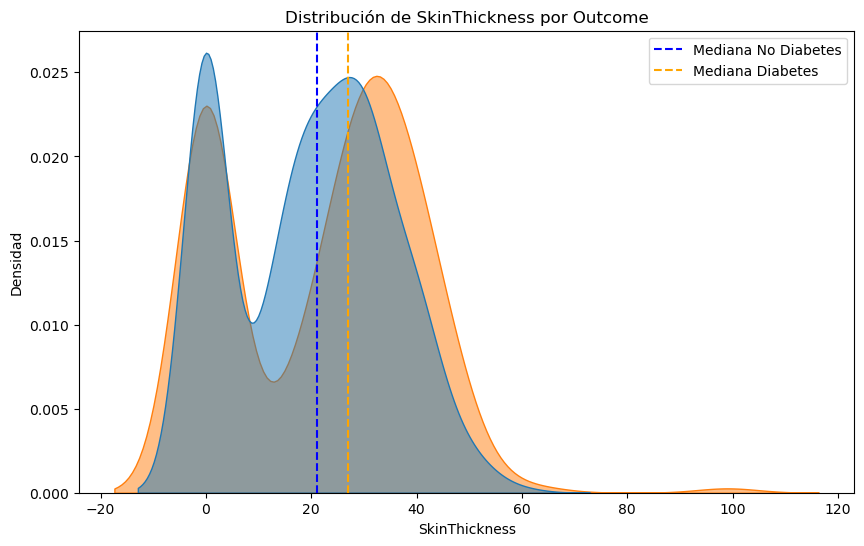

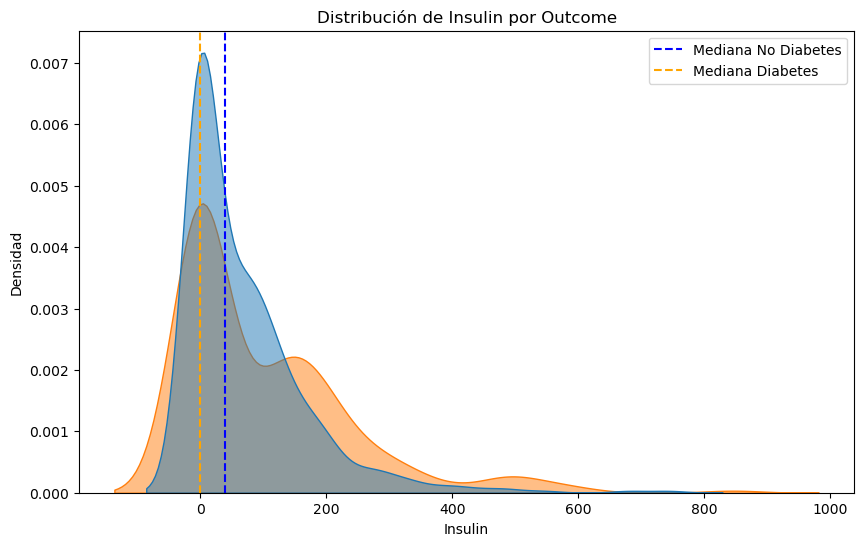

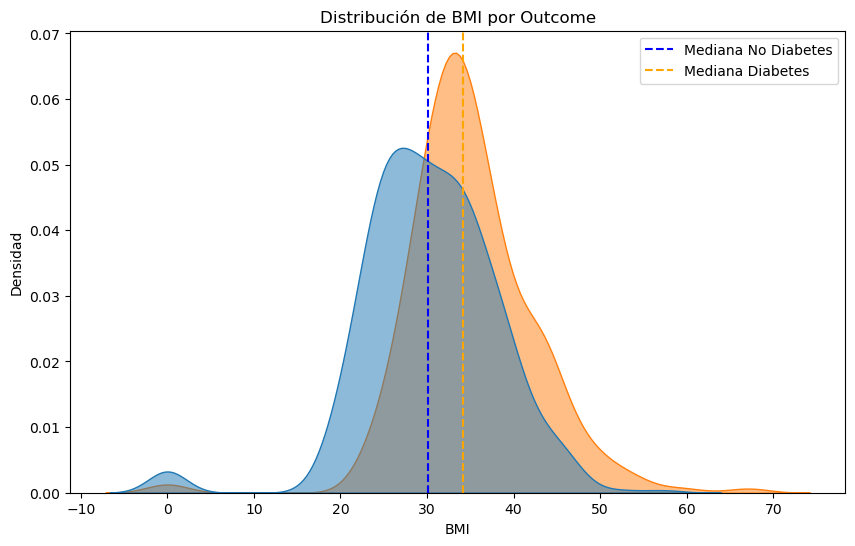

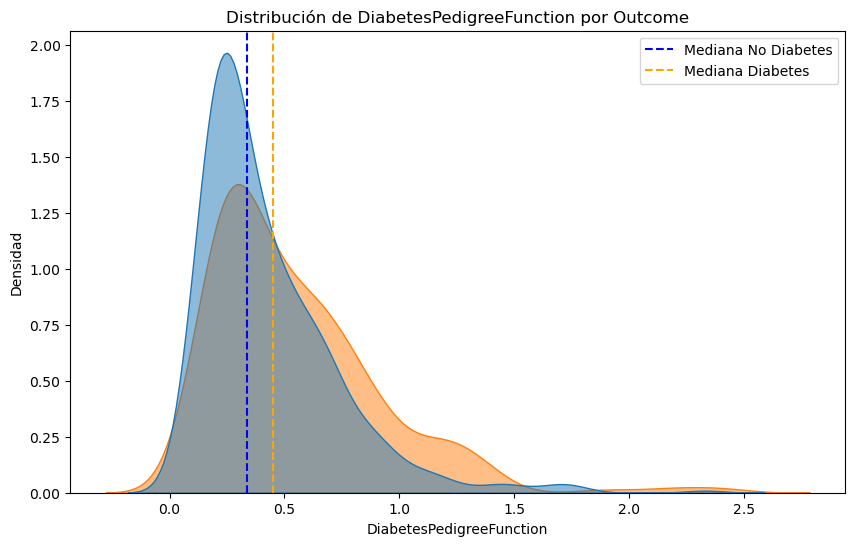

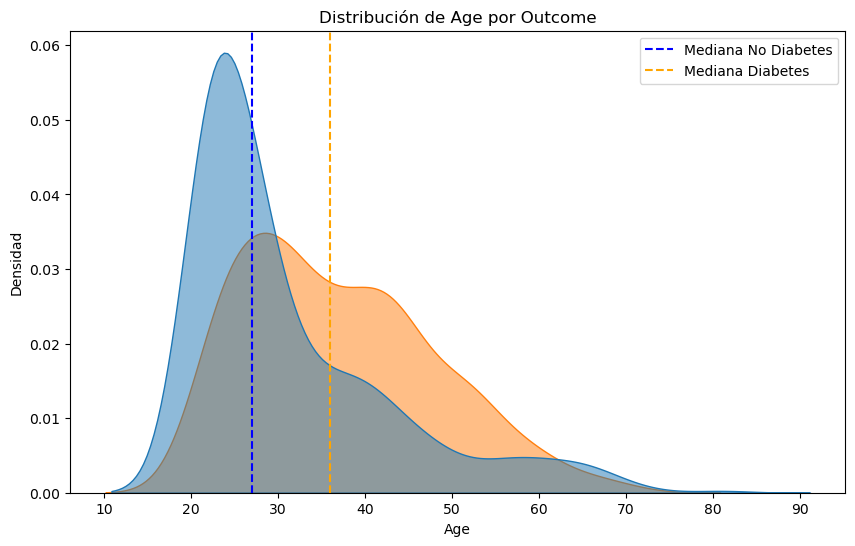

In [56]:
#Comparemos las distribuciones de cada parametro para los pacientes con y sin diabetes, resaltando la mediana de cada grupo.
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=column, hue='Outcome', fill=True, common_norm=False, alpha=0.5)
    
    # Calcular y marcar las medianas
    median_no_diabetes = df[df['Outcome'] == 0][column].median()
    median_diabetes = df[df['Outcome'] == 1][column].median()
    plt.axvline(median_no_diabetes, color='blue', linestyle='--', label='Mediana No Diabetes')
    plt.axvline(median_diabetes, color='orange', linestyle='--', label='Mediana Diabetes')
    
    plt.title(f'Distribución de {column} por Outcome')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

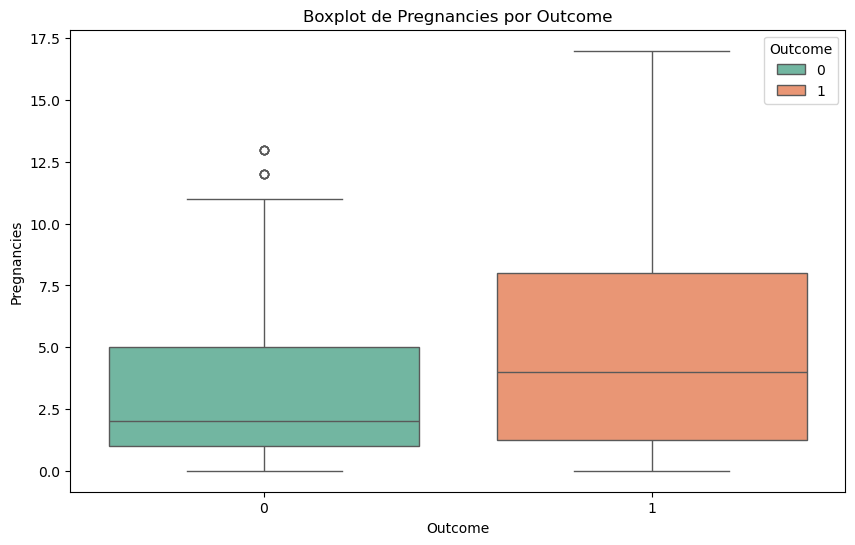

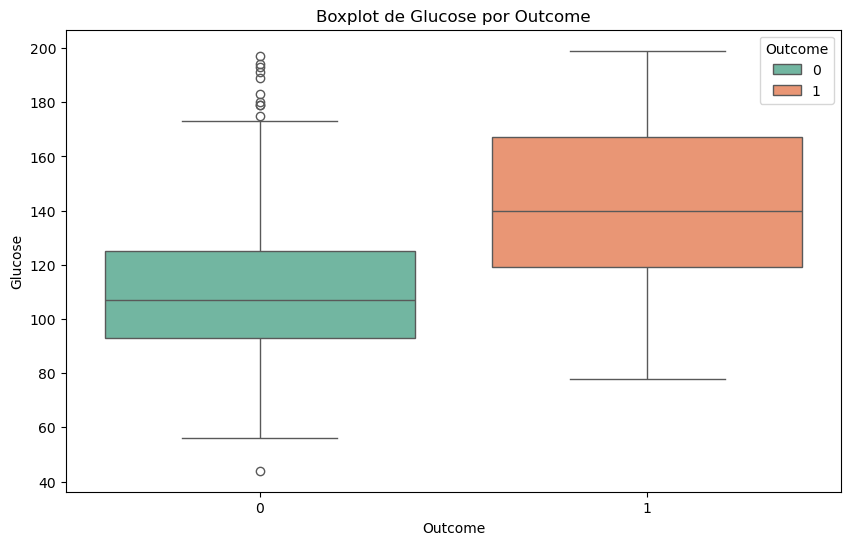

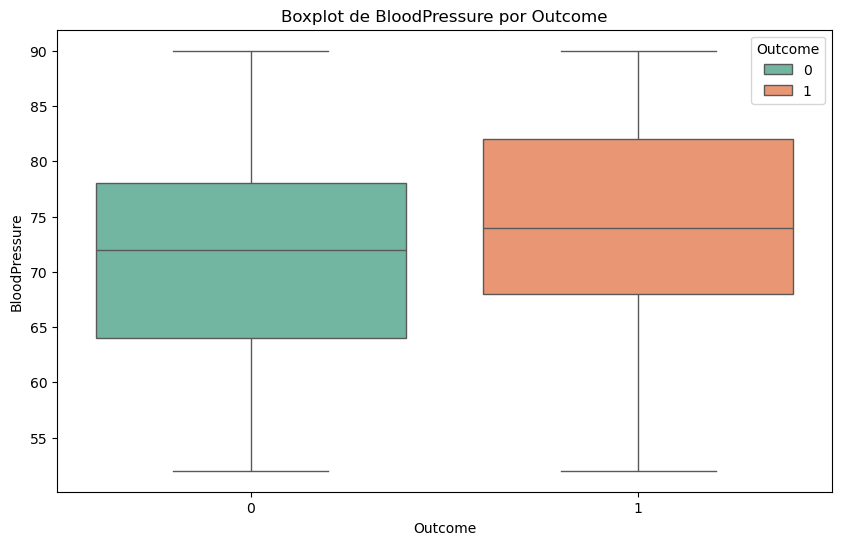

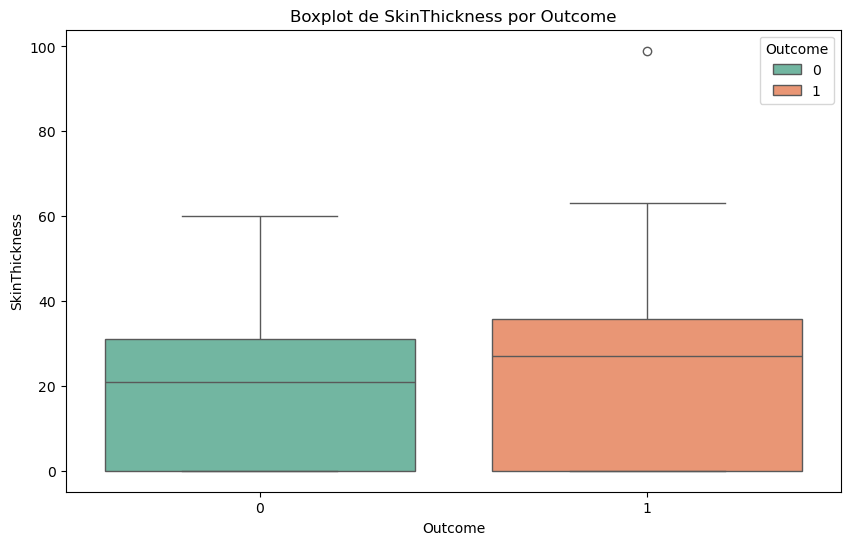

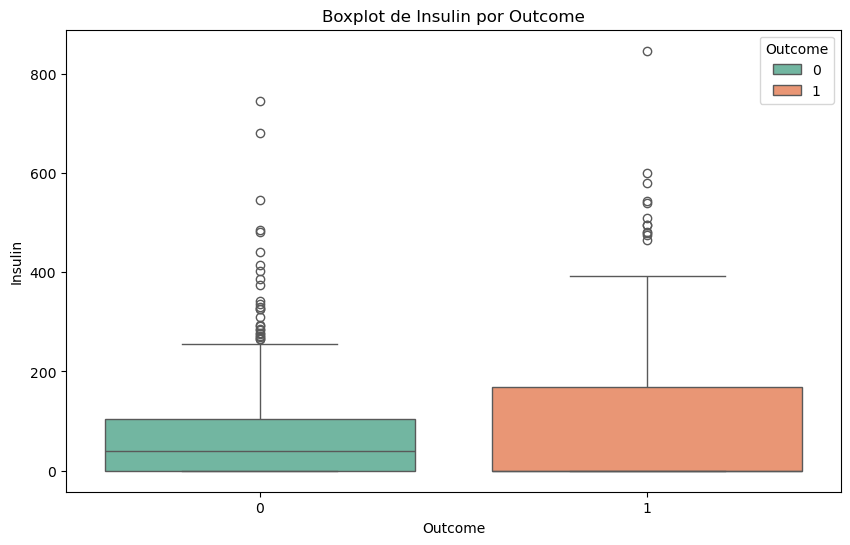

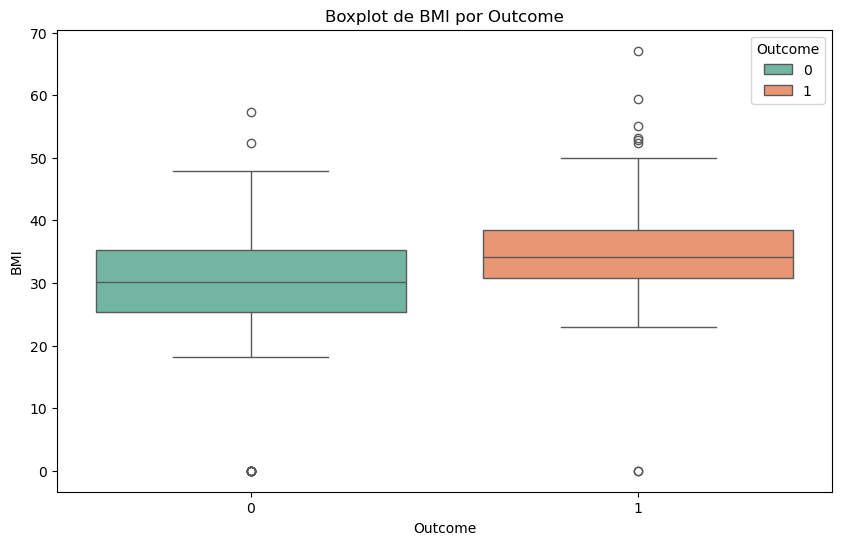

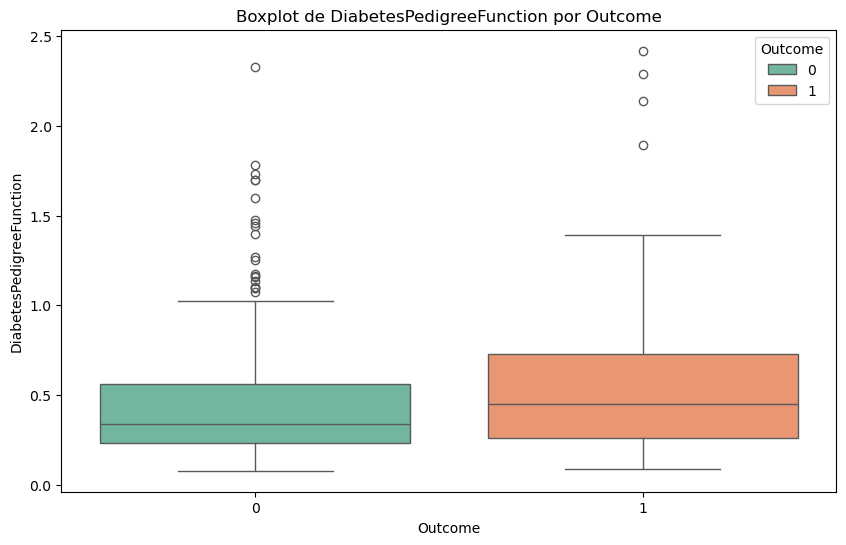

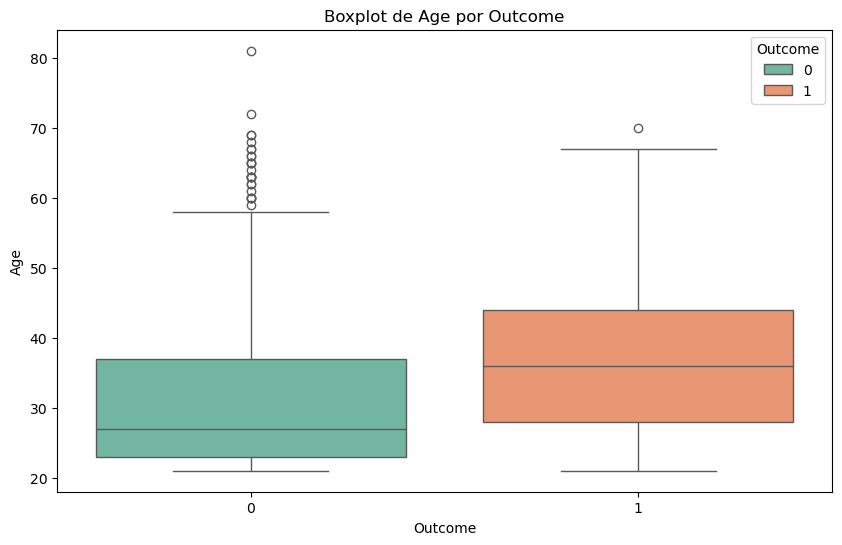

In [57]:
#Lo mismo pero con boxplots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outcome', y=column, data=df, hue='Outcome', palette='Set2')
    plt.title(f'Boxplot de {column} por Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(column)
    plt.show()

## 🧭 ¿Qué hacer con outliers una vez identificados?

### Paso 1: Verificar si es error
Preguntas rápidas:
- ¿Está fuera del rango lógico? (rating 9 cuando es 1–5)
- ¿Unidad incorrecta? (shipping_cost 3000 cuando normalmente es 5–30)
- ¿Duplicados o registros repetidos?
- ¿Formato/parseo malo? (fecha “2099-99-99”)

✅ Si es error confirmado:
- Corregir si hay fuente confiable.
- Si no se puede corregir: convertir a `NaN` y tratar como missing (imputar/flag).

---

### Paso 2: Si no es error, decidir estrategia según objetivo

#### A) Mantenerlos (si son parte real del negocio)

- Los extremos importan (fraude, VIP, casos críticos).


#### B) Capar/Winsorizar (limitar extremos)
Cambias valores extremos por un límite superior/inferior (ej. P1 y P99).

- Los extremos dominan gráficos/estadísticas.

👉 Recomendación:
- Registrar la operación (no hacerlo “en silencio”).
- Guardar el original si lo necesitas después.


#### C) Eliminar (último recurso)

- Son errores y no se pueden corregir.
- O están contaminando el análisis y no representan el fenómeno.

⚠️ Riesgo:
- Sesgo: puedes eliminar justo los casos que importan.

## ¿Qué aprendimos hoy? 🧠

1. Una distribución describe cómo se reparten los valores; la forma (sesgo, colas, picos) cambia la interpretación

2. La normal es una distribución simétrica tipo campana; normalidad es aproximarse a esa forma para habilitar reglas útiles

3. En normalidad, la regla 68–95–99

4. Un histograma se lee por forma, colas y picos; los bins pueden engañar → complementa con boxplot/percentiles

5. **Variabilidad:** rango y std son sensibles a extremos

    * IQR es robusto y describe el centro del 50%

6. **Outliers:**

    * IQR es mejor en sesgo/colas largas
    * Z-score funciona mejor si hay normalidad aproximada

## Próxima Clase ⏭️: 

* Funciones de file
* Segmentación de clientes
* GitHub

# Sesión Práctica 💪: Habilidades técnicas python y GitHub

## Ejercicios: funciones de fila para segmentación de clientes (condicionales + bucles) + mini apartado GitHub

## 🎯 Objetivos de la sesión
Al final de esta clase podrás:

1. Crear **funciones de fila** usando `if/elif/else` y manipulando correctamente nulos y outliers.
2. Integrar **bucles** dentro de funciones para evaluar reglas, contar condiciones o aplicar “scoring”.
3. Aplicar segmentaciones típicas.
5. Entender el flujo básico de **GitHub** para entregar y versionar notebooks.

---

## 🧭 Agenda
1. **Repaso rápido (10 min):** row functions, condicionales y loops.
2. **Ejercicio 1 (20 min):** segmentación por reglas (VIP/Loyal/At risk).
3. **Ejercicio 2 (25 min):** scoring por puntos con bucle (customer score).
4. **Ejercicio 3 (20 min):** flags de calidad + segmentación “limpia”.
5. **Mini apartado GitHub (15–20 min):** repo, commit, push, README.


## Ejercicio 1:

* Diseña una función que recorra las columnas numericas de un dataset, cuente e indentifique los `outliers` de cada columna.
* Crea funciones que permitan darle diferentes manejos a los outliers: eliminar, reemplazar o capar.
* Identifica las "reglas" o "rangos" para clasificar a un paciente como riesgo alto, bajo, medio de desarrollar diabetes y agrega recomendaciones para ellos.
* Diseña una función de fila que genere una columna en el dataset con la respectiva clasificación.

Utiliza el dataset de Diabetes, aunque las funciones de limpieza deberían funcionar tambien para otros datasets.

diabetes_url='https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/diabetes.csv'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/diabetes.csv')
display(df.sample(10))
df.info()

## Ejercicio 2:

* Diseña una función que recorra las columnas numericas de un dataset, cuente e indentifique los `outliers` de cada columna.
* Crea funciones que permitan darle diferentes manejos a los outliers: eliminar, reemplazar o capar.

* Identifica las "reglas" o "rangos" para realizar una segmentación tipo RFM.

    - Recency: días desde última compra (si tienes fechas)

    - Frequency: # pedidos por customer (order_id)

    - Monetary: suma de total_amount

    **Categorías típicas:**

    - VIP, Loyal, At risk, New, Low value

* Diseña una función de fila que genere una columna en el dataset con la respectiva clasificación.


sales_url='https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/Online_Sales.csv'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/Online_Sales.csv')
display(df.sample(10))
df.info()

## ¿Qué aprendimos hoy? 🧠

### ¡FELICIDADES POR LLEGAR HASTA AQUI! Nos vemos en el Sprint 8 ➡️➡️

